In [ ]:
WAV = '/Users/hbredin/Development/pyannote/pyannote-audio/tutorials/assets/sample.wav'
REF = '/Users/hbredin/Development/pyannote/pyannote-audio/tutorials/assets/sample.rttm'

In [ ]:
from pyannote.database.util import load_rttm
reference = load_rttm(REF)['sample']

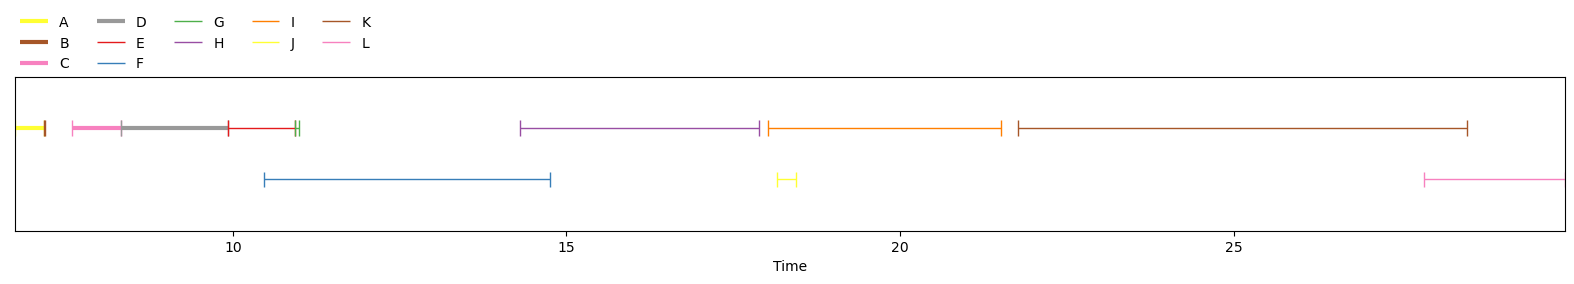

In [ ]:
# here, I simulate your segmentation pipeline 
# but you should obviously use your own instead
from pyannote.audio import Pipeline
import torch
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1").to(torch.device('mps'))
segmentation = pipeline(WAV).relabel_tracks()
segmentation

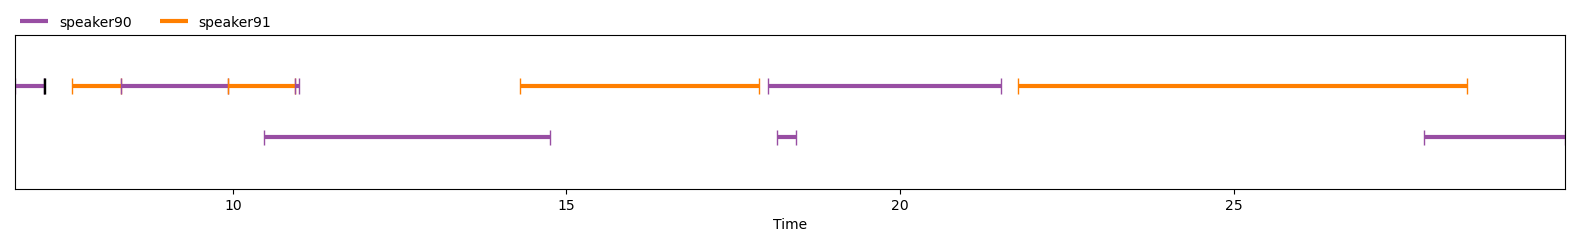

In [ ]:
# simulate oracle clustering by assigning to each segment
# the label from reference coocurring the most.

segmentation_with_oracle_clustering = segmentation.empty()
for segment, track in segmentation.itertracks():
    label = reference.argmax(segment)
    segmentation_with_oracle_clustering[segment, track] = label

segmentation_with_oracle_clustering

In [ ]:
# we should do better than that (see the two overlapping purple segments around time t=18s)
# but, with the time we have left before the Interspeech deadline, that is our only option
# I guess. Ideally, we should prevent two overlapping segments (from our segmentation) to
# end up in the same cluster after oracle clustering.

In [ ]:
# now, we can compute a DER with oracle clustering
# to compute a nice new Figure 7 (same format as Figures 5 and 6)
# that could be cited in the conclusion to explain a bit better 
# the future work related to incremental clustering
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()
metric(reference, segmentation_with_oracle_clustering)

0.05345995893223817